In [ ]:
# Installing required packages

!pip install kaggle xgboost scikit-learn imbalanced-learn matplotlib seaborn

In [ ]:
# Importing Required Libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from xgboost import XGBClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, precision_recall_curve, average_precision_score,
    accuracy_score, f1_score, precision_score, recall_score
)
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Uploading Kaggle API credentials (kaggle.json file)

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vaibhavkhanna007","key":"428675ab6293115a923d51de9d52f910"}'}

In [ ]:
# Moving kaggle.json to the proper location

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Downloading the dataset

!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0


In [ ]:
# Unzipping the dataset

!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
# Loading the dataset

df = pd.read_csv('creditcard.csv')
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking class distribution

class_dist = df['Class'].value_counts()
print('Class distribution:')
print(class_dist)


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


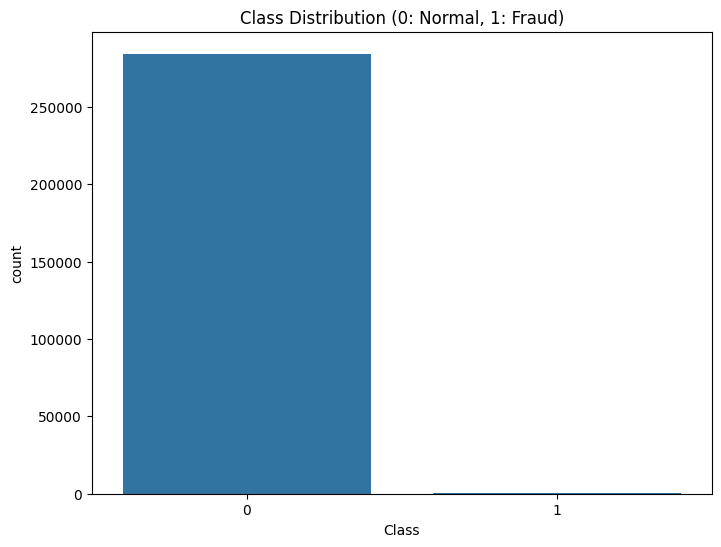

In [ ]:
# Visualizing class distribution

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.show()


In [ ]:
# Checking for missing values

print('\nMissing values per column:')
print(df.isnull().sum())


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Summary statistics

print('\nSummary statistics:')
df.describe()



Summary statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Separating features and target

X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Splitting data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardizing features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Applying random undersampling to balance the classes

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)

In [ ]:
# Checking new class distribution

print('Resampled class distribution:')
print(pd.Series(y_train_resampled).value_counts())

Resampled class distribution:
Class
0    394
1    394
Name: count, dtype: int64


In [ ]:
# Dictionary to store model performance

model_performance = {}

In [ ]:
# Logistic Regression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print('Logistic Regression Performance:')
print(classification_report(y_test, y_pred_lr))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

model_performance['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1 Score': f1_score(y_test, y_pred_lr),
    'ROC AUC': roc_auc_score(y_test, y_prob_lr),
    'PR AUC': average_precision_score(y_test, y_prob_lr)
}


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix:
[[54606  2258]
 [    8    90]]


In [ ]:
# Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print('Random Forest Performance:')
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

model_performance['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_prob_rf),
    'PR AUC': average_precision_score(y_test, y_prob_rf)
}

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix:
[[54828  2036]
 [    8    90]]


In [ ]:

# XGBoost Classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

print('XGBoost Performance:')
print(classification_report(y_test, y_pred_xgb))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_xgb))

model_performance['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb),
    'ROC AUC': roc_auc_score(y_test, y_prob_xgb),
    'PR AUC': average_precision_score(y_test, y_prob_xgb)
}

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Confusion Matrix:
[[54255  2609]
 [    8    90]]


In [ ]:
# Isolation Forest

iso_forest = IsolationForest(n_estimators=100, contamination=float(len(y_train[y_train==1]))/len(y_train), random_state=42)
iso_forest.fit(X_train_scaled)

y_pred_iso = iso_forest.predict(X_test_scaled)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

print('Isolation Forest Performance:')
print(classification_report(y_test, y_pred_iso))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_iso))

model_performance['Isolation Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_iso),
    'Precision': precision_score(y_test, y_pred_iso),
    'Recall': recall_score(y_test, y_pred_iso),
    'F1 Score': f1_score(y_test, y_pred_iso),
    'ROC AUC': roc_auc_score(y_test, y_pred_iso),
    'PR AUC': average_precision_score(y_test, y_pred_iso)
}

Isolation Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.34      0.32        98

    accuracy                           1.00     56962
   macro avg       0.65      0.67      0.66     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56790    74]
 [   65    33]]


In [ ]:
# One-Class SVM

X_train_normal = X_train_scaled[y_train == 0]
oc_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma='auto')
oc_svm.fit(X_train_normal)

y_pred_ocsvm = oc_svm.predict(X_test_scaled)
y_pred_ocsvm = [1 if x == -1 else 0 for x in y_pred_ocsvm]

print('One-Class SVM Performance:')
print(classification_report(y_test, y_pred_ocsvm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_ocsvm))

model_performance['One-Class SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_ocsvm),
    'Precision': precision_score(y_test, y_pred_ocsvm),
    'Recall': recall_score(y_test, y_pred_ocsvm),
    'F1 Score': f1_score(y_test, y_pred_ocsvm),
    'ROC AUC': roc_auc_score(y_test, y_pred_ocsvm),
    'PR AUC': average_precision_score(y_test, y_pred_ocsvm)
}

One-Class SVM Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.84      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
[[56162   702]
 [   16    82]]


In [ ]:
# Converting performance dictionary to DataFrame

performance_df = pd.DataFrame.from_dict(model_performance, orient='index')
performance_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC,PR AUC
Logistic Regression,0.960219,0.038330,0.918367,0.073590,0.976126,0.656263
Random Forest,0.964116,0.042333,0.918367,0.080935,0.977697,0.695286
XGBoost,0.954057,0.033346,0.918367,0.064355,0.974863,0.374964
Isolation Forest,0.997560,0.308411,0.336735,0.321951,0.667717,0.104994
One-Class SVM,0.987395,0.104592,0.836735,0.185941,0.912195,0.087797


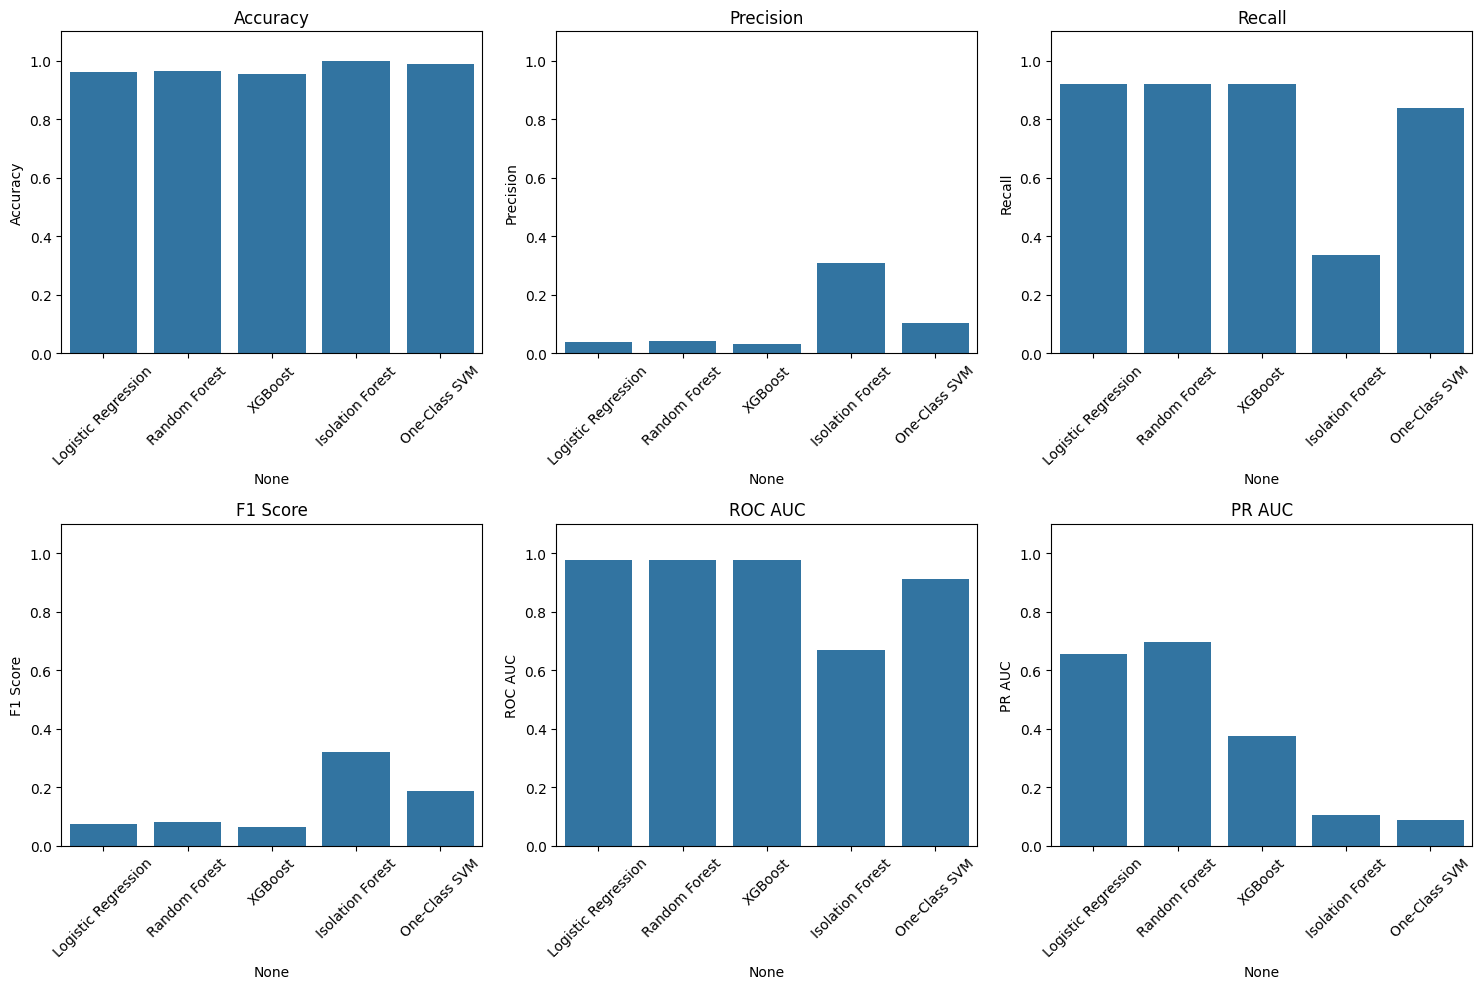

In [ ]:
# Plot comparison

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=performance_df.index, y=performance_df[metric])
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()